In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path=r"Data_set/signal_metrics.csv"
df=pd.read_csv(file_path)
(df.head())

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


Timestamp                       0
Locality                        0
Latitude                        0
Longitude                       0
Signal Strength (dBm)           0
Signal Quality (%)              0
Data Throughput (Mbps)          0
Latency (ms)                    0
Network Type                    0
BB60C Measurement (dBm)         0
srsRAN Measurement (dBm)        0
BladeRFxA9 Measurement (dBm)    0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [5]:
a=df['Signal Strength (dBm)'].min()
b=df['Signal Strength (dBm)'].max()
print(a,b)

-116.94226674903167 -74.6448479734431


In [6]:
# Define bins for Signal Strength
bins = [-np.inf, -115, -110, -105, -100, -95,-90,-85,-80,-75 ,np.inf]
labels = ['<-115', '-115 to -110', '-110 to -105', '-105 to -100', '-100 to -95', '-95 to -90','-90 to -85','-85 to -80','-80 to -75','>-75']

# Categorize Signal Strength into bins
df['Signal Strength Category'] = pd.cut(df['Signal Strength (dBm)'], bins=bins, labels=labels)

# Display the first few rows to verify
df.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Signal Strength Category
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000,-85 to -80
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892,-100 to -95
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070,-90 to -85
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698,-95 to -90
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467,-95 to -90


In [7]:
# Create a new column with 'Data Throughput (Mbps)' as integers
df = df.assign(Data_Throughput_Int=df['Data Throughput (Mbps)'].astype(int))

In [8]:
c=df["Data_Throughput_Int"].min()
d=df["Data_Throughput_Int"].max()
print(c,d)

1 99


In [9]:
# Categorize 'Data Throughput (Mbps)' into bins of size 10
df['Throughput Category'] = pd.cut(df['Data_Throughput_Int'], bins=np.arange(0, df['Data_Throughput_Int'].max() + 10, 10))
df

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Signal Strength Category,Data_Throughput_Int,Throughput Category
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000,-85 to -80,1,"(0, 10]"
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892,-100 to -95,5,"(0, 10]"
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070,-90 to -85,1,"(0, 10]"
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698,-95 to -90,68,"(60, 70]"
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467,-95 to -90,38,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16824,2023-06-10 23:44:23.950552,Pataliputra,25.542846,85.129611,-92.024221,0.0,3.720856,53.376474,4G,-90.177947,-97.971619,-93.362041,-95 to -90,3,"(0, 10]"
16825,2023-06-10 23:47:31.160725,Boring Canal Road,25.724624,85.233365,-87.579509,0.0,2.117080,134.458401,LTE,-87.694985,-92.616868,-84.749607,-90 to -85,2,"(0, 10]"
16826,2023-06-10 23:50:38.370898,Boring Road,25.574020,85.030036,-90.451396,0.0,72.870842,32.556578,5G,-91.098875,-97.447725,-87.752628,-95 to -90,72,"(70, 80]"
16827,2023-06-10 23:53:45.581071,Boring Road,25.619325,85.183155,-85.661814,0.0,2.482843,144.007572,3G,0.000000,0.000000,0.000000,-90 to -85,2,"(0, 10]"


In [10]:
numeric_cols = ['Latitude', 'Longitude', 'Signal Strength (dBm)', 'Signal Quality (%)',
                'Data Throughput (Mbps)', 'Latency (ms)', 'BB60C Measurement (dBm)',
                'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']

In [11]:
df.describe()

,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Data_Throughput_Int
count,16829.000000,16829.000000,16829.000000,16829.0,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000
mean,25.594796,85.137314,-90.072484,0.0,16.182856,101.313624,-68.820150,-74.439562,-68.819930,15.681740
std,0.089881,0.090095,5.399368,0.0,25.702734,56.010418,40.046739,43.215204,39.996934,25.698658
min,25.414575,84.957936,-116.942267,0.0,1.000423,10.019527,-115.667514,-124.652054,-119.207545,1.000000
25%,25.522858,85.064124,-93.615962,0.0,2.001749,50.320775,-94.021959,-101.249987,-93.749032,2.000000
50%,25.595383,85.138149,-89.665566,0.0,2.997175,100.264318,-89.126942,-96.838442,-89.282746,2.000000
75%,25.667620,85.209504,-86.145491,0.0,9.956314,149.951112,0.000000,0.000000,0.000000,9.000000
max,25.773648,85.316994,-74.644848,0.0,99.985831,199.991081,0.000000,0.000000,0.000000,99.000000


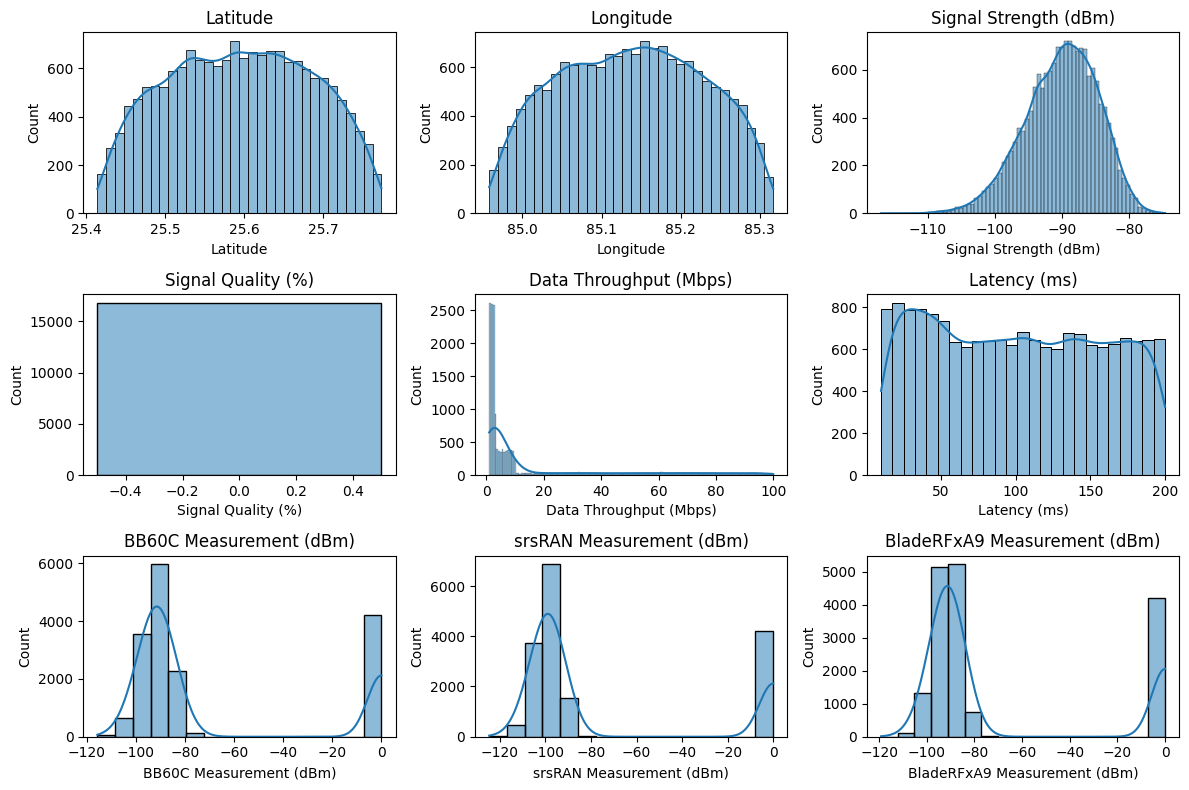

In [12]:
# Visualize distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

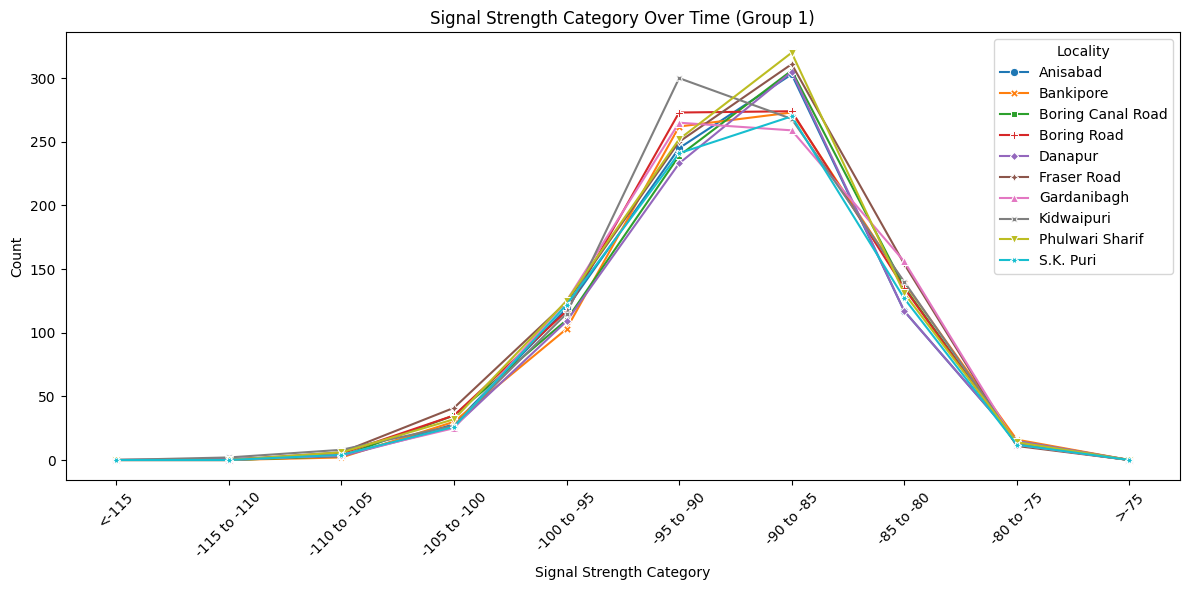

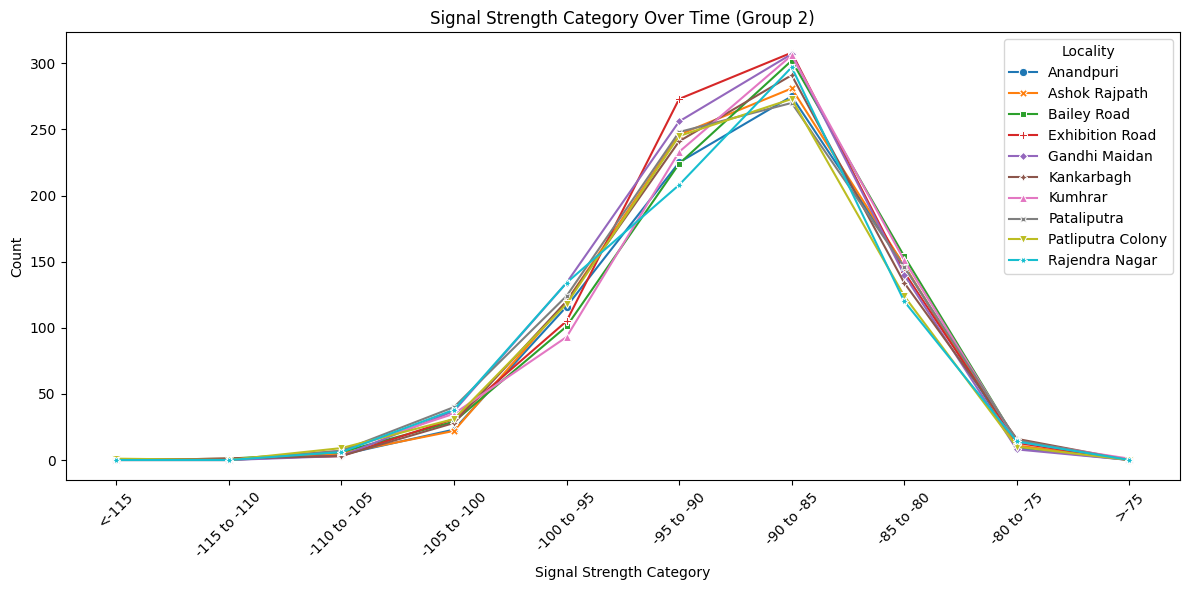

In [13]:
# Split Locality into two groups
locality_groups = np.array_split(df['Locality'].unique(), 2)

# Plotting for each group
for i, locality_group in enumerate(locality_groups):
    # Filter DataFrame for current locality_group
    df_group = df[df['Locality'].isin(locality_group)]
    
    # Group by Locality and Signal Strength Category
    grouped = df_group.groupby(['Locality', 'Signal Strength Category']).size().unstack(fill_value=0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped.T, markers=True, dashes=False)
    plt.title(f'Signal Strength Category Over Time (Group {i+1})')
    plt.xlabel('Signal Strength Category')
    plt.ylabel('Count')
    plt.legend(title='Locality', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Timestamp                     16829 non-null  object  
 1   Locality                      16829 non-null  object  
 2   Latitude                      16829 non-null  float64 
 3   Longitude                     16829 non-null  float64 
 4   Signal Strength (dBm)         16829 non-null  float64 
 5   Signal Quality (%)            16829 non-null  float64 
 6   Data Throughput (Mbps)        16829 non-null  float64 
 7   Latency (ms)                  16829 non-null  float64 
 8   Network Type                  16829 non-null  object  
 9   BB60C Measurement (dBm)       16829 non-null  float64 
 10  srsRAN Measurement (dBm)      16829 non-null  float64 
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64 
 12  Signal Strength Category      16829 non-null  

In [15]:
# Example of filling NaN values
df['Data Throughput (Mbps)'].fillna(0, inplace=True)

In [16]:
# Example of converting types
df['Throughput Category'] = df['Throughput Category'].astype(str)  # Ensure it's a string type for categorical plotting

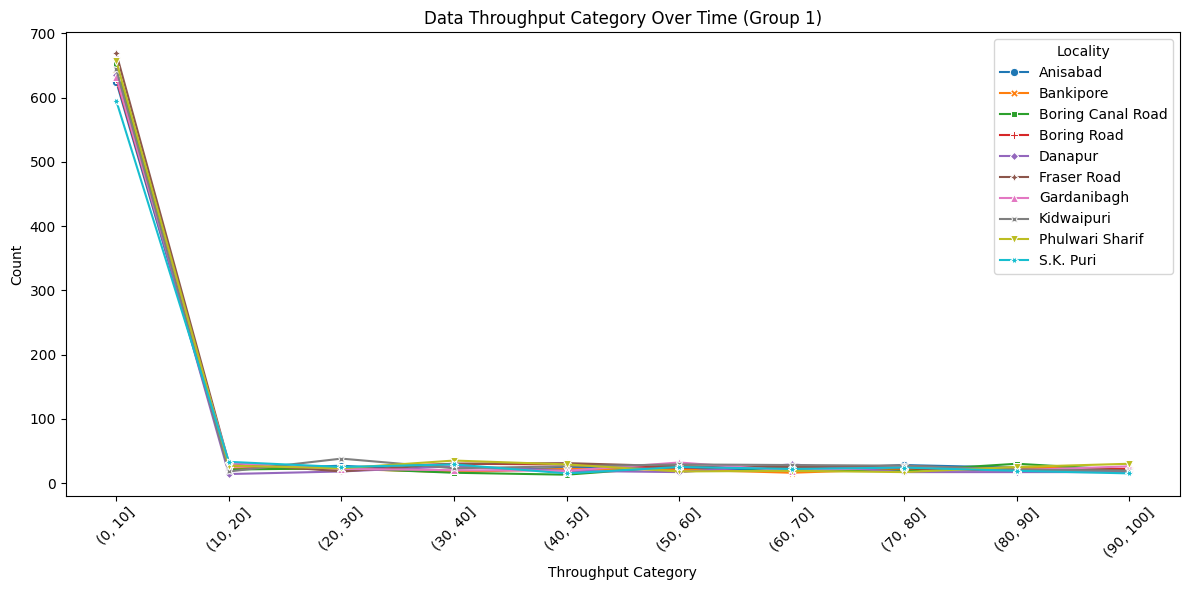

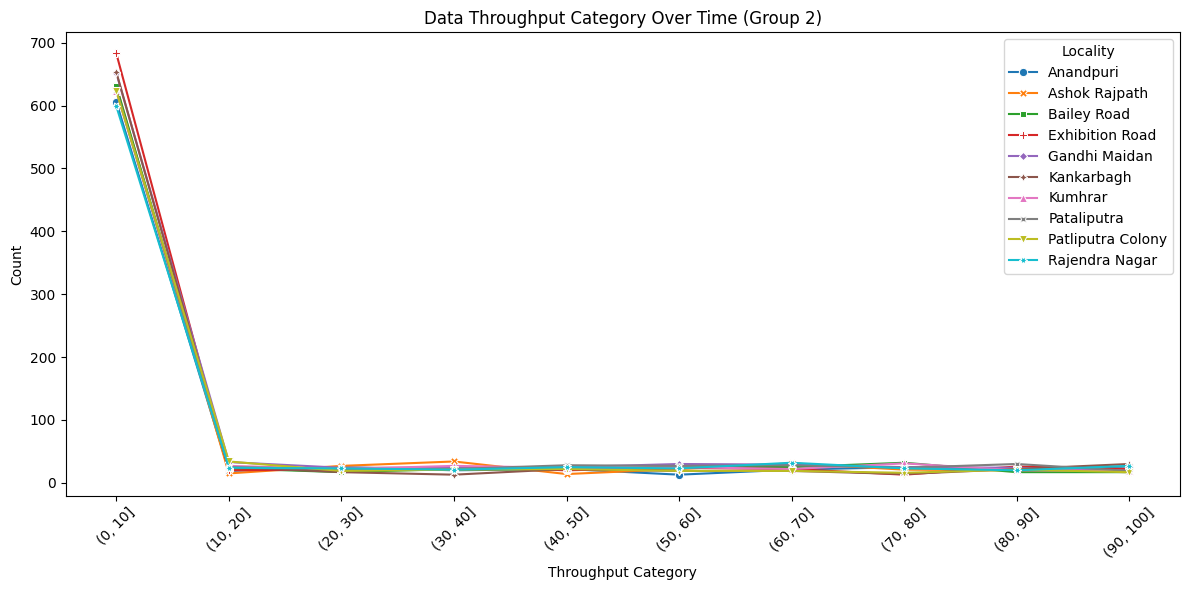

In [17]:
# Split Locality into two groups
locality_groups = np.array_split(df['Locality'].unique(), 2)
# Plotting for each group
for i, locality_group in enumerate(locality_groups):
    # Filter DataFrame for current locality_group
    df_group = df[df['Locality'].isin(locality_group)]
    
    # Group by Locality and Throughput Category
    grouped = df_group.groupby(['Locality', 'Throughput Category']).size().unstack(fill_value=0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped.T, markers=True, dashes=False)
    plt.title(f'Data Throughput Category Over Time (Group {i+1})')
    plt.xlabel('Throughput Category')
    plt.ylabel('Count')
    plt.legend(title='Locality', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

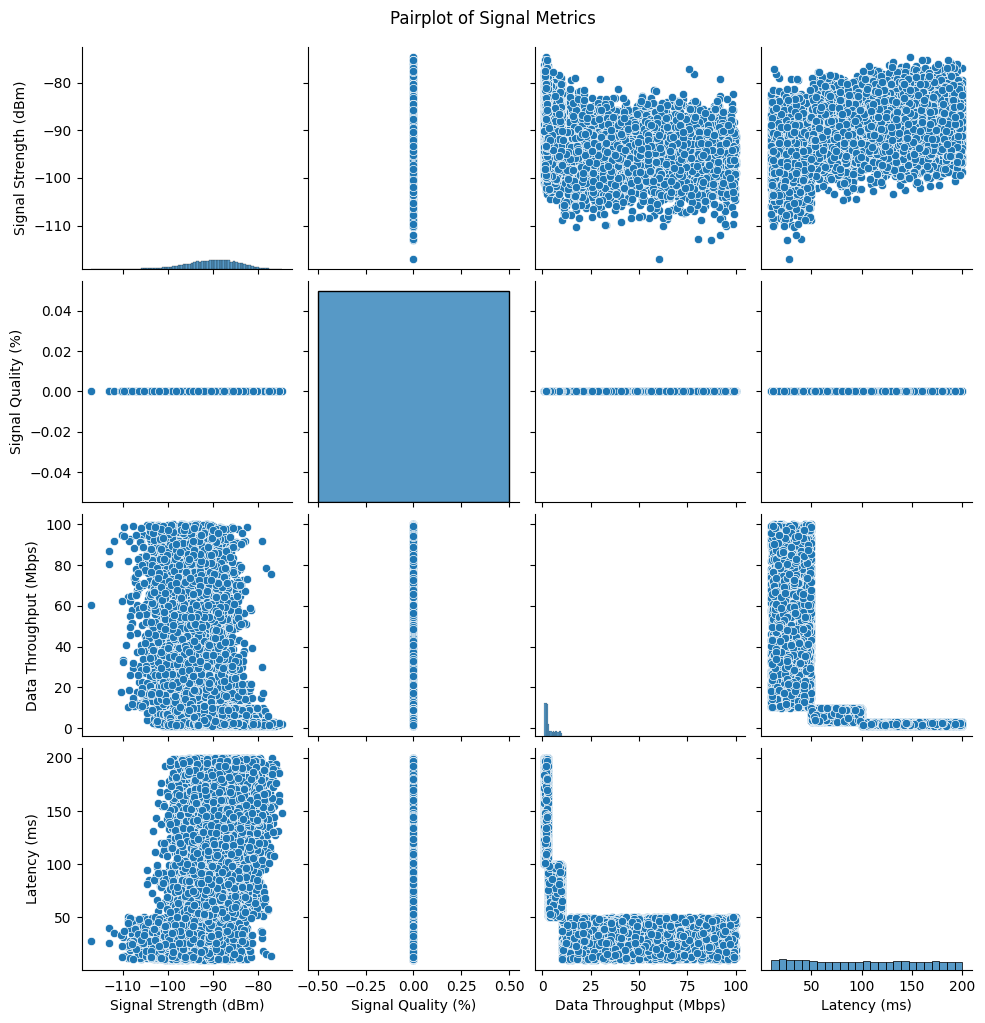

In [18]:
# Select relevant columns for pairplot
columns_for_pairplot = ['Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)', 'Latency (ms)']

# Create pairplot
sns.pairplot(df[columns_for_pairplot])
plt.suptitle('Pairplot of Signal Metrics', y=1.02)  # y= some height > 1 to avoid overlap
plt.show()

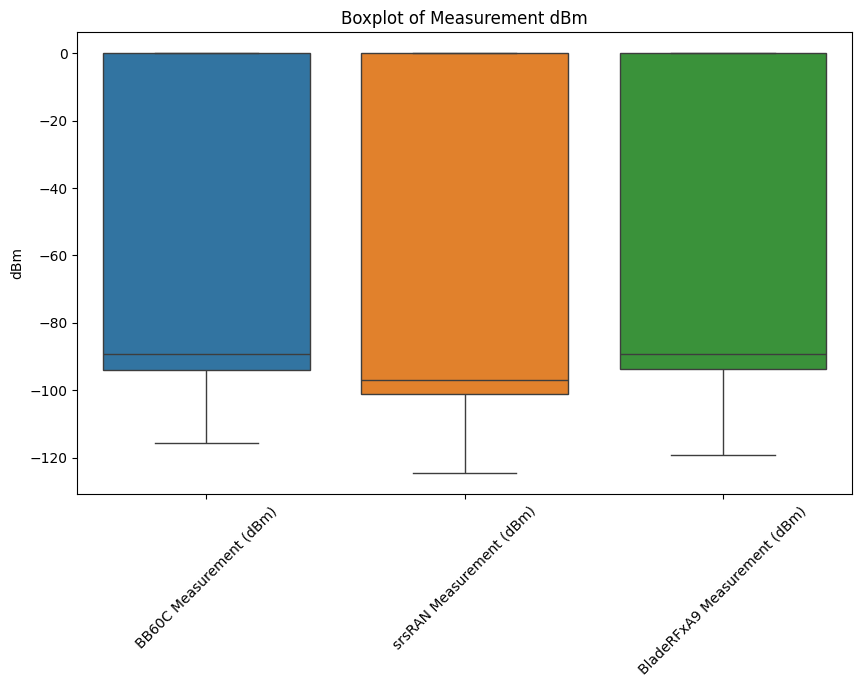

In [19]:
# Select columns for boxplot
columns_for_boxplot = ['BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_for_boxplot])
plt.title('Boxplot of Measurement dBm')
plt.ylabel('dBm')
plt.xticks(rotation=45)
plt.show()

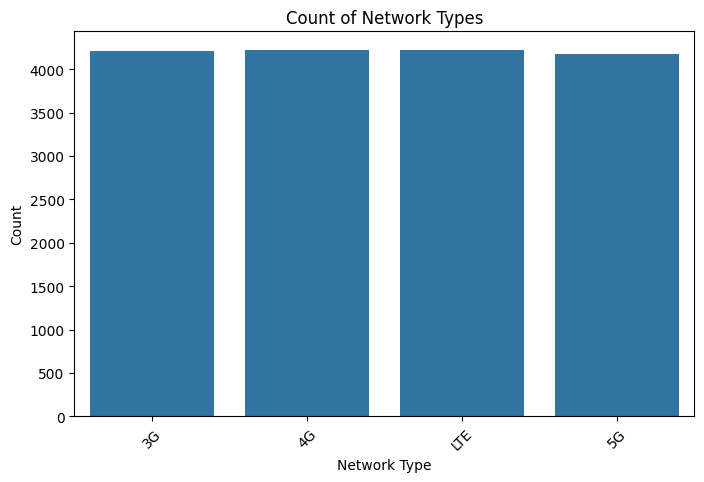

In [20]:
# Countplot of Network Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Network Type')
plt.title('Count of Network Types')
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

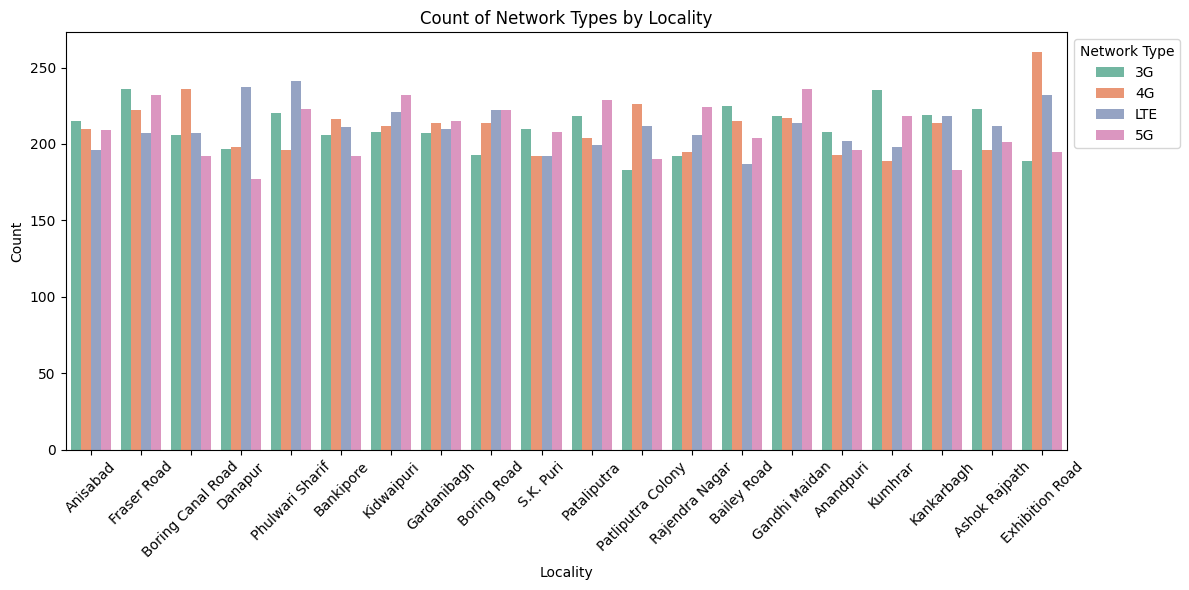

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Network Type by Locality
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Locality', hue='Network Type', palette='Set2')
plt.title('Count of Network Types by Locality')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Network Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

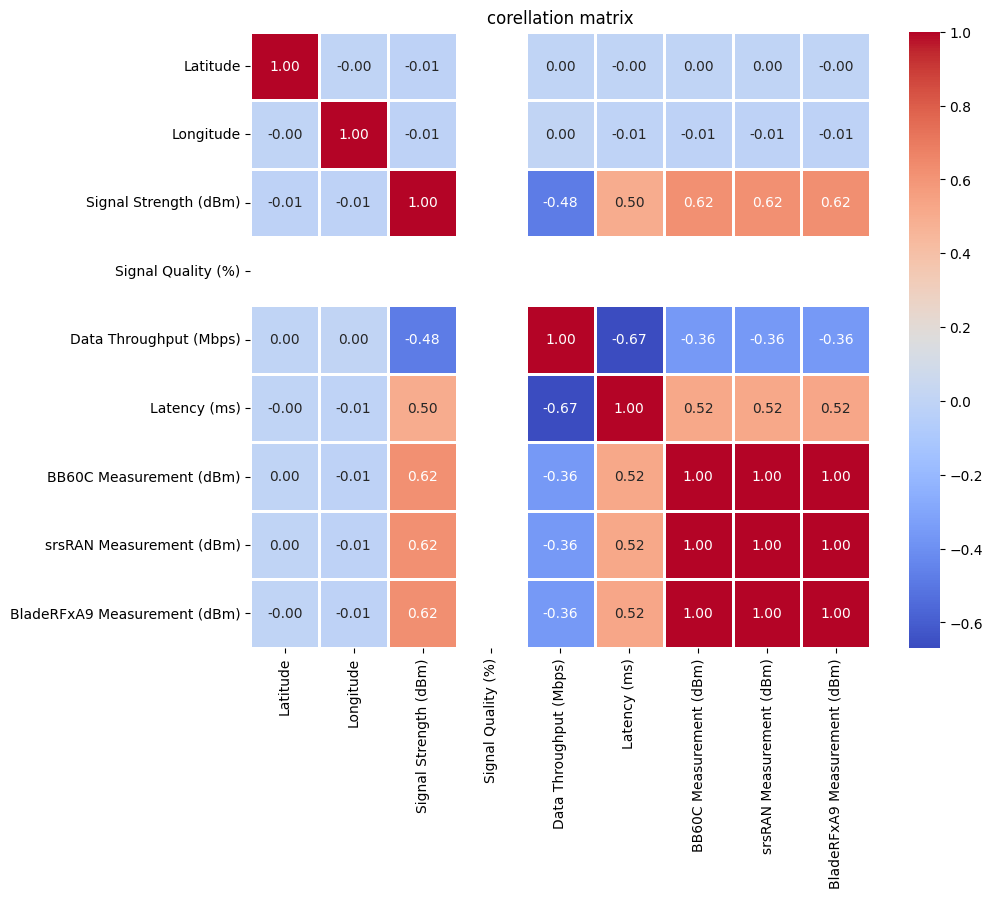

In [22]:
corellation_matrix=df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corellation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=1)
plt.title('corellation matrix')
plt.show()

In [23]:
corellation_matrix

,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
Latitude,1.000000,-0.000686,-0.012869,NaN,0.000526,-0.002053,0.000141,0.000349,-0.000089
Longitude,-0.000686,1.000000,-0.010267,NaN,0.003507,-0.006455,-0.013663,-0.013173,-0.012687
Signal Strength (dBm),-0.012869,-0.010267,1.000000,NaN,-0.483769,0.503550,0.621724,0.616974,0.622611
Signal Quality (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Throughput (Mbps),0.000526,0.003507,-0.483769,NaN,1.000000,-0.668173,-0.358088,-0.355608,-0.358540
Latency (ms),-0.002053,-0.006455,0.503550,NaN,-0.668173,1.000000,0.523898,0.522373,0.524406
BB60C Measurement (dBm),0.000141,-0.013663,0.621724,NaN,-0.358088,0.523898,1.000000,0.997586,0.997369
srsRAN Measurement (dBm),0.000349,-0.013173,0.616974,NaN,-0.355608,0.522373,0.997586,1.000000,0.998831
BladeRFxA9 Measurement (dBm),-0.000089,-0.012687,0.622611,NaN,-0.358540,0.524406,0.997369,0.998831,1.000000


In [24]:
## Encode categorical variables if needed
label_encoder = LabelEncoder()
df['Locality_encoded'] = label_encoder.fit_transform(df['Locality'])
df['NetworkType_encoded'] = label_encoder.fit_transform(df['Network Type'])

In [25]:
# Split data into training and testing sets
X = df[['Locality_encoded', 'Latitude', 'Longitude', 
        'Signal Quality (%)', 'Data Throughput (Mbps)', 'Latency (ms)', 
        'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)', 'NetworkType_encoded']]
y = df[ 'Signal Strength (dBm)']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 14.664669646515298
R-squared: 0.4810994727249832


In [28]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 14.664669646515298
R-squared: 0.4810994727249832


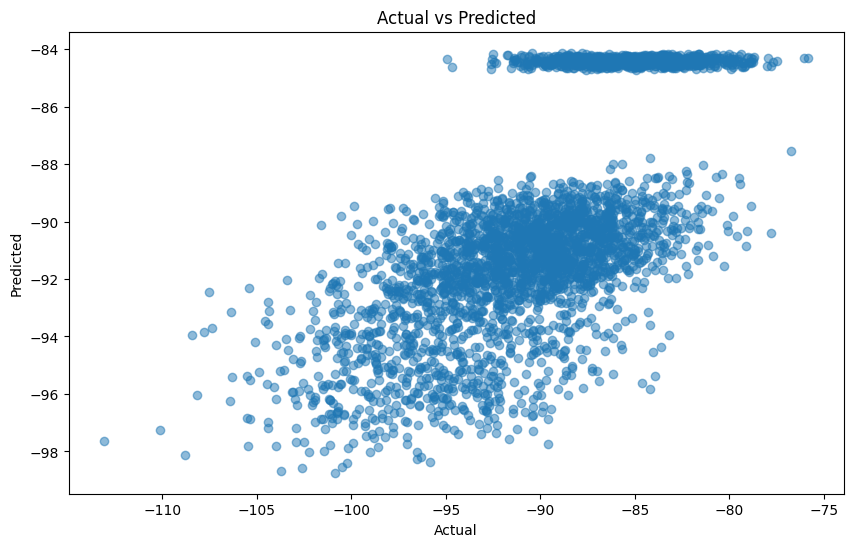

In [30]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter to control regularization strength
ridge_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression R-squared: {r2_ridge}')


Ridge Regression Mean Squared Error: 14.664742976917845
Ridge Regression R-squared: 0.48109687797273426


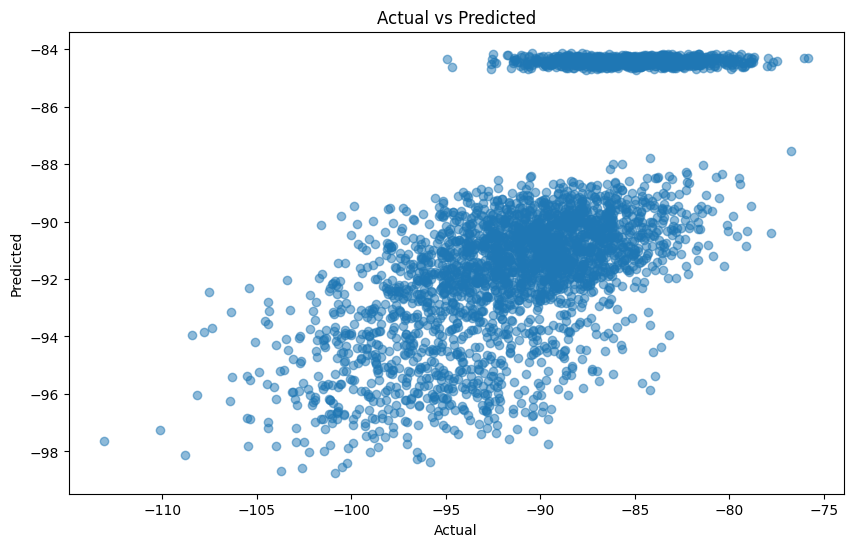

In [32]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [1]:
!pip freeze

absl-py==2.1.0
anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.1.0
blinker==1.8.2
certifi==2024.7.4
cffi==1.17.0
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
et-xmlfile==1.1.0
executing==2.0.1
fastjsonschema==2.20.0
Flask==3.0.3
flatbuffers==24.3.25
fonttools==4.53.1
fqdn==1.5.1
gast==0.6.0
google-pasta==0.2.0
grpcio==1.66.0
h11==0.14.0
h5py==3.11.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
imbalanced-learn==0.12.3
imblearn==0.0
ipykernel==6.29.5
ipython==8.26.0
isoduration==20.11.0
itsdangerous==2.2.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.2
jupyter_core==5.7.2
jupyter_server==2.14.2
jupyter_serve